In [2]:
ls

drive/  sample_data/


In [3]:
cd  /content/drive/MyDrive/cnn/Flowers-Dataset/flowers

/content/drive/MyDrive/cnn/Flowers-Dataset/flowers


image argumentation

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen=ImageDataGenerator(rescale = 1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [6]:
test_datagen=ImageDataGenerator(rescale = 1./255)

In [7]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/cnn/Flowers-Dataset/flowers/train",target_size=(64,64),class_mode="categorical",batch_size=50)

Found 3510 images belonging to 5 classes.


In [8]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/cnn/Flowers-Dataset/flowers/test",target_size=(64,64),class_mode="categorical",batch_size=25)

Found 848 images belonging to 5 classes.


In [9]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

cnn

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [11]:
model = Sequential()

In [12]:
model.add(Convolution2D(32,(3,3),activation="relu",strides=(1, 1),input_shape=(64,64,3)))

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Flatten())

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.add(Dense(300,activation="relu"))
model.add(Dense(300,activation="relu"))


In [18]:
model.add(Dense(5,activation="softmax"))

In [19]:
model.compile(loss ="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [22]:
model.fit(x_train,epochs=10,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=10)

Epoch 1/10
71/71 [==============================] - 38s 529ms/step - loss: 0.9093 - accuracy: 0.6382 - val_loss: 1.1276 - val_accuracy: 0.5840
Epoch 2/10
71/71 [==============================] - 40s 565ms/step - loss: 0.8966 - accuracy: 0.6359 - val_loss: 1.1192 - val_accuracy: 0.6080
Epoch 3/10
71/71 [==============================] - 37s 521ms/step - loss: 0.8612 - accuracy: 0.6607 - val_loss: 0.9399 - val_accuracy: 0.6480
Epoch 4/10
71/71 [==============================] - 38s 534ms/step - loss: 0.8129 - accuracy: 0.6818 - val_loss: 1.1832 - val_accuracy: 0.5640
Epoch 5/10
71/71 [==============================] - 38s 538ms/step - loss: 0.7927 - accuracy: 0.6954 - val_loss: 1.1644 - val_accuracy: 0.5800
Epoch 6/10
71/71 [==============================] - 40s 564ms/step - loss: 0.7917 - accuracy: 0.7011 - val_loss: 1.0951 - val_accuracy: 0.6200
Epoch 7/10
71/71 [==============================] - 39s 549ms/step - loss: 0.7341 - accuracy: 0.7185 - val_loss: 1.0267 - val_accuracy: 0.6360

In [23]:
model.save('flower.h5')

testing

In [24]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('flower.h5')

In [38]:
img=image.load_img(r"/content/drive/MyDrive/cnn/Flowers-Dataset/flowers/train/rose/12338444334_72fcc2fc58_m.jpg")

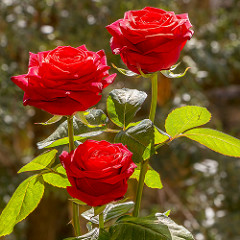

In [39]:
img

In [40]:
img=image.load_img(r"/content/drive/MyDrive/cnn/Flowers-Dataset/flowers/train/rose/12338444334_72fcc2fc58_m.jpg",target_size=(64,64))

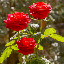

In [41]:
img

In [42]:
x=image.img_to_array(img)

In [43]:
x

array([[[114., 107.,  89.],
        [202., 192., 180.],
        [188., 178., 168.],
        ...,
        [101.,  85.,  69.],
        [ 67.,  60.,  32.],
        [ 76.,  68.,  32.]],

       [[121., 113.,  92.],
        [126., 121.,  99.],
        [118., 113.,  94.],
        ...,
        [ 83.,  68.,  45.],
        [ 69.,  63.,  31.],
        [ 86.,  75.,  47.]],

       [[101.,  91.,  64.],
        [ 87.,  81.,  49.],
        [ 86.,  74.,  36.],
        ...,
        [ 54.,  49.,  20.],
        [ 74.,  70.,  35.],
        [ 75.,  67.,  31.]],

       ...,

       [[163., 176.,   8.],
        [184., 197.,   3.],
        [188., 206.,   8.],
        ...,
        [ 73.,  68.,  30.],
        [ 67.,  66.,  38.],
        [ 79.,  73.,  37.]],

       [[173., 183.,   0.],
        [223., 226.,   0.],
        [133., 120.,  41.],
        ...,
        [ 65.,  52.,  18.],
        [ 62.,  57.,  27.],
        [ 67.,  61.,  29.]],

       [[102.,  71.,   6.],
        [115., 100.,  43.],
        [102.,  

In [44]:
x=np.expand_dims(x,axis=0)

In [45]:
x

array([[[[114., 107.,  89.],
         [202., 192., 180.],
         [188., 178., 168.],
         ...,
         [101.,  85.,  69.],
         [ 67.,  60.,  32.],
         [ 76.,  68.,  32.]],

        [[121., 113.,  92.],
         [126., 121.,  99.],
         [118., 113.,  94.],
         ...,
         [ 83.,  68.,  45.],
         [ 69.,  63.,  31.],
         [ 86.,  75.,  47.]],

        [[101.,  91.,  64.],
         [ 87.,  81.,  49.],
         [ 86.,  74.,  36.],
         ...,
         [ 54.,  49.,  20.],
         [ 74.,  70.,  35.],
         [ 75.,  67.,  31.]],

        ...,

        [[163., 176.,   8.],
         [184., 197.,   3.],
         [188., 206.,   8.],
         ...,
         [ 73.,  68.,  30.],
         [ 67.,  66.,  38.],
         [ 79.,  73.,  37.]],

        [[173., 183.,   0.],
         [223., 226.,   0.],
         [133., 120.,  41.],
         ...,
         [ 65.,  52.,  18.],
         [ 62.,  57.,  27.],
         [ 67.,  61.,  29.]],

        [[102.,  71.,   6.],
       

In [46]:
pred=model.predict(x)

1/1 [==============================] - 0s 32ms/step


In [47]:
pred

array([[0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        7.131993e-25]], dtype=float32)

In [48]:
x_test.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [51]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [53]:
index[np.argmax(pred)]

'rose'